<a href="https://colab.research.google.com/github/marce3-2140/Unsupervised-ML-Models/blob/main/Country_Analysis_of_KMeans_Clusters.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Dataset Segmentacion Por Paises**

* Tomado de: [Customer-Segmentation-Kaggle](https://github.com/Nikhil-Adithyan/Customer-Segmentation-with-K-Means)

* En este ejercicio, una organización sin fines de lucro quiere dirigirse a países para realizar obras y proyectos benéficos.  Quieren que nos dirijamos a un grupo de países que necesitan de estos servicios.  Nos han pedido agrupar las naciones utilizando los datos que nos proporcionaron para identificar un grupo de países en los que deberían centrarse.  También quisieran saber qué tipos de problemas debería abordar en estos países

## Librerias

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# librerias
import numpy as np
import pandas as pd
import seaborn as sns
import plotly.express as px
import matplotlib.pyplot as plt
import matplotlib.style as style
from mpl_toolkits.mplot3d import Axes3D
from termcolor import colored as cl
import matplotlib.cm as cm

#Preprocesamiento
from sklearn.preprocessing import StandardScaler, OneHotEncoder

# modelar
from sklearn.cluster import KMeans
# metricas
from sklearn.metrics import silhouette_score
from sklearn.datasets import make_blobs
from sklearn.metrics import silhouette_samples, silhouette_score
from yellowbrick.cluster import SilhouetteVisualizer

**Cargar Datos**

In [ ]:
file = ('/content/drive/MyDrive/CodingDojo/Cargas/No_Supervised/Country-data - Country-data.csv')
df = pd.read_csv(file, index_col='country')
df.head()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
country,,,,,,,,,
Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200


##**I. Analisis Exploratorio de Datos**

In [ ]:
df.duplicated().sum()

0

In [ ]:
df.isnull().sum()

child_mort    0
exports       0
health        0
imports       0
income        0
inflation     0
life_expec    0
total_fer     0
gdpp          0
dtype: int64

In [ ]:
df.describe(include='all')

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
count,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000
mean,38.270060,41.108976,6.815689,46.890215,17144.688623,7.781832,70.555689,2.947964,12964.155689
std,40.328931,27.412010,2.746837,24.209589,19278.067698,10.570704,8.893172,1.513848,18328.704809
min,2.600000,0.109000,1.810000,0.065900,609.000000,-4.210000,32.100000,1.150000,231.000000
25%,8.250000,23.800000,4.920000,30.200000,3355.000000,1.810000,65.300000,1.795000,1330.000000
50%,19.300000,35.000000,6.320000,43.300000,9960.000000,5.390000,73.100000,2.410000,4660.000000
75%,62.100000,51.350000,8.600000,58.750000,22800.000000,10.750000,76.800000,3.880000,14050.000000
max,208.000000,200.000000,17.900000,174.000000,125000.000000,104.000000,82.800000,7.490000,105000.000000


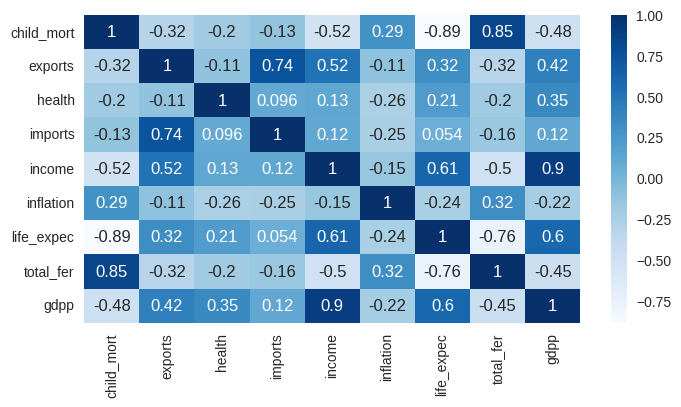

In [ ]:
#Identificamos correlaciones entre las columnas
corr = df.corr()
plt.figure(figsize=(8,4)) #Grafico Size
sns.heatmap(corr, cmap="Blues", annot=True); #Creamos el mapa de calor
plt.show();

## **II. Visualizacion de Datos**

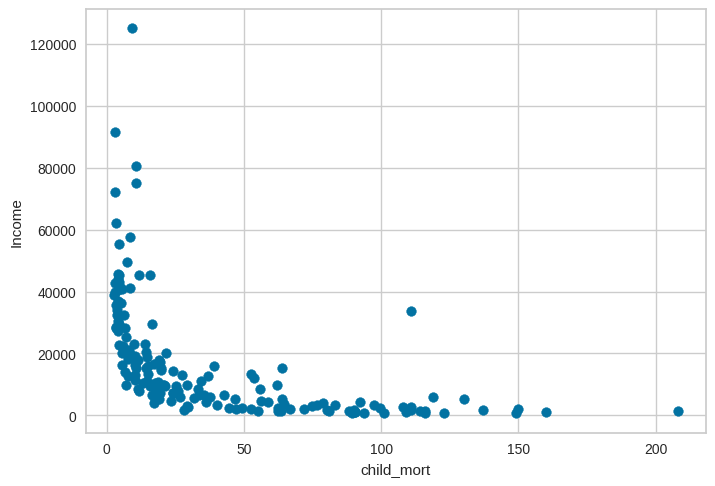

In [ ]:
# Visualize data
plt.scatter(df['child_mort'], df['income'])
plt.xlabel('child_mort')
plt.ylabel('Income');

> Nota: Aunque la correlacion no es muy significativa, a medida que aumneta el DebIncomeRatio disminuy el Incumplimiento.

In [ ]:
df.columns

Index(['child_mort', 'exports', 'health', 'imports', 'income', 'inflation',
       'life_expec', 'total_fer', 'gdpp'],
      dtype='object')

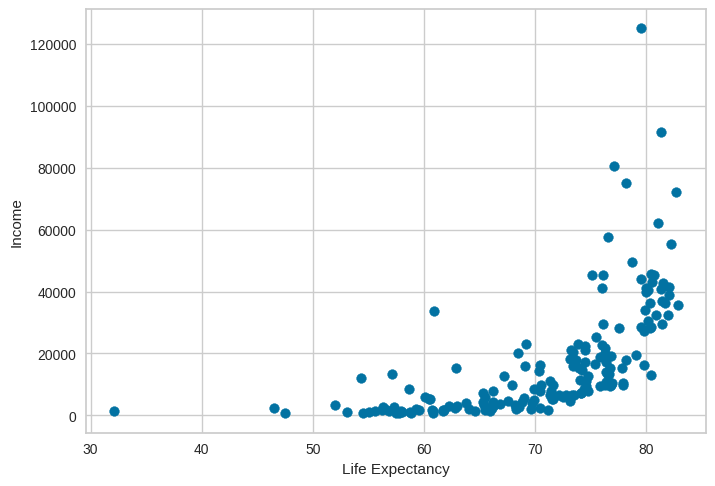

In [ ]:
# Visualize data
plt.scatter(df['life_expec'], df['income'])
plt.xlabel('Life Expectancy')
plt.ylabel('Income');

## **II. Preprocesado**

In [ ]:
# Scale the data
scaler = StandardScaler()
X_scaled = pd.DataFrame(scaler.fit_transform(df), columns=df.columns)
X_scaled.head()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,1.291532,-1.138280,0.279088,-0.082455,-0.808245,0.157336,-1.619092,1.902882,-0.679180
1,-0.538949,-0.479658,-0.097016,0.070837,-0.375369,-0.312347,0.647866,-0.859973,-0.485623
2,-0.272833,-0.099122,-0.966073,-0.641762,-0.220844,0.789274,0.670423,-0.038404,-0.465376
3,2.007808,0.775381,-1.448071,-0.165315,-0.585043,1.387054,-1.179234,2.128151,-0.516268
4,-0.695634,0.160668,-0.286894,0.497568,0.101732,-0.601749,0.704258,-0.541946,-0.041817


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

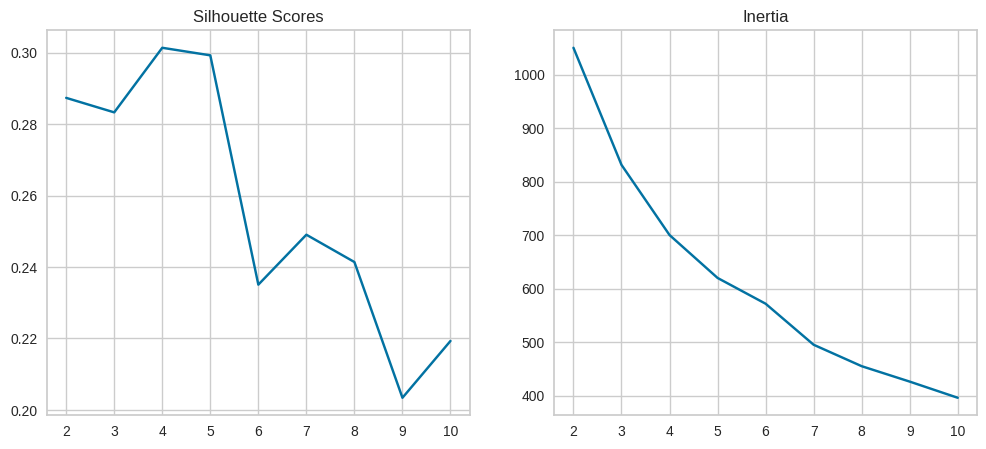

In [ ]:
# Iterate over a range of k clusters to find the optimal number of clusters
ks = range(2,11)
sils = []
inertias = []
for k in ks:
  kmeans = KMeans(n_clusters=k, random_state=42)
  kmeans.fit(X_scaled)
  sils.append(silhouette_score(X_scaled, kmeans.labels_))
  inertias.append(kmeans.inertia_)
#plot inertias and silhouette scores for each number of clusters.
fig, axes = plt.subplots(1,2, figsize=(12,5))
axes[0].plot(ks, sils)
axes[0].set_title('Silhouette Scores')
axes[0].set_xticks(ks)
axes[1].plot(ks, inertias)
axes[1].set_title('Inertia')
axes[1].set_xticks(ks);

> Nota: En el trazado de Puntuacion de Silueta y un Codo en el trazado de Inercia, que coinciden en 4 clusters como la mejor agrupacion.


In [ ]:
'''Ajustemos un nuevo modelo con 4 clústeres
   y agreguemos esos clústeres a una nueva columna
    en nuestro dataframe original (sin escala).
'''

# Refit KMeans with 4 clusters
kmeans = KMeans(n_clusters=4, random_state=42)
kmeans.fit(X_scaled)
# Add the clusters as a column in the dataframe
df['cluster'] = kmeans.labels_
df.head()

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,cluster
country,,,,,,,,,,
Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553,1
Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090,0
Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460,0
Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530,1
Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200,0


**Los valores medios nos dan la idea del cluster en su conjunto**

In [ ]:
#Agruparemos los datos por clúster
#y agregaremos los grupos por los valores medios de cada característica.
# Add as_index=False so that the clusters are a column, not the index
cluster_groups = df.groupby('cluster', as_index=False).mean()
cluster_groups


,cluster,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,0,21.389655,41.290678,6.235862,48.038689,12968.620690,7.413460,72.935632,2.286552,6919.103448
1,1,92.961702,29.151277,6.388511,42.323404,3942.404255,12.019681,59.187234,5.008085,1922.382979
2,2,4.953333,45.826667,9.168667,39.736667,45250.000000,2.742200,80.376667,1.795333,43333.333333
3,3,4.133333,176.000000,6.793333,156.666667,64033.333333,2.468000,81.433333,1.380000,57566.666667


**Visualizar los Clusteres**

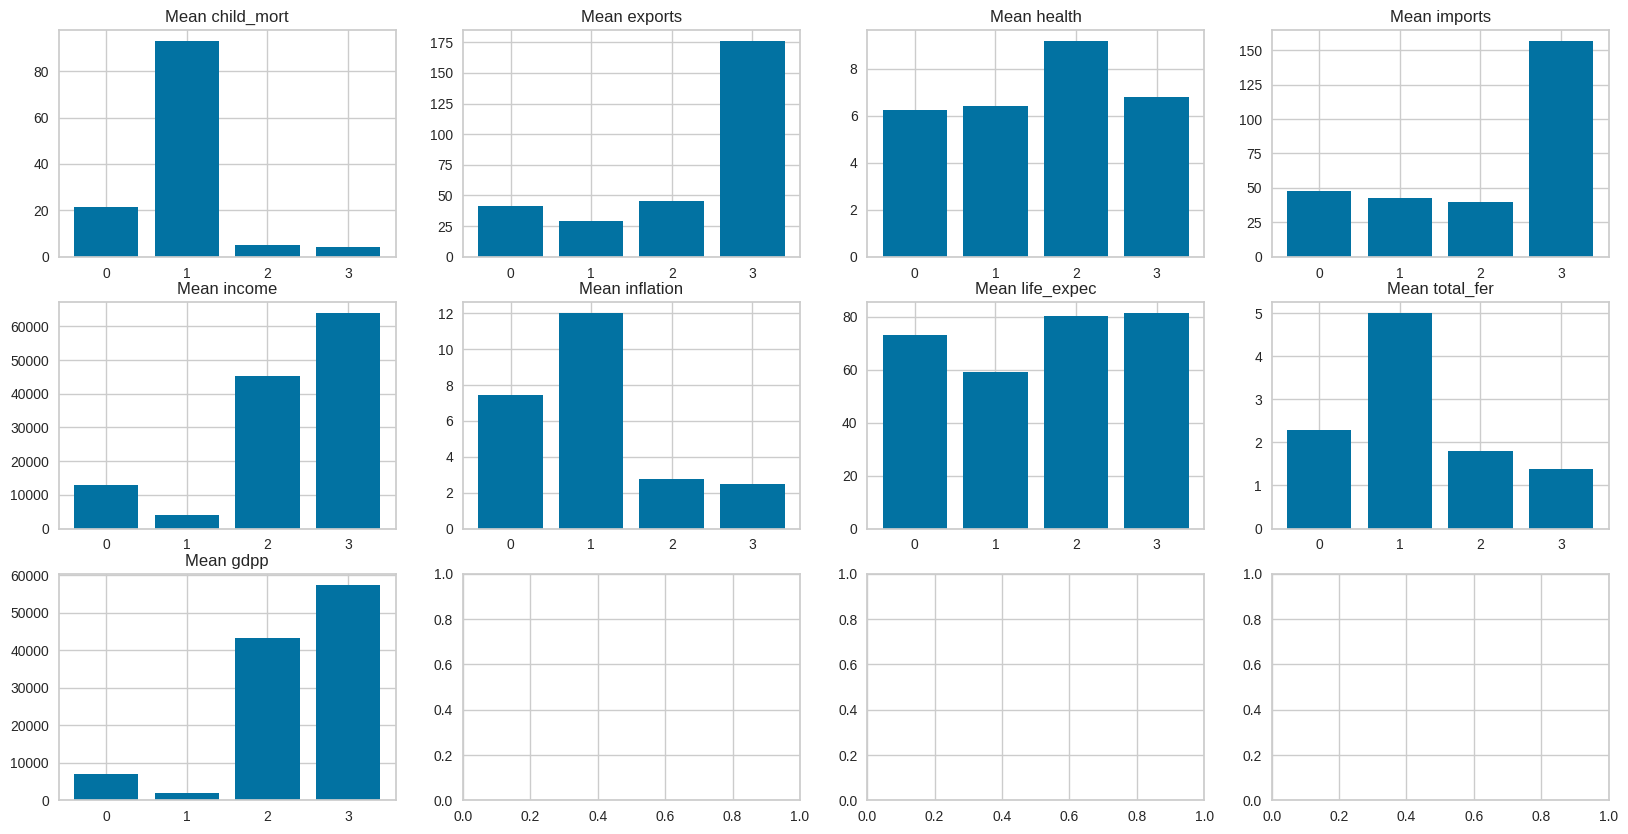

In [ ]:
# Visualize means
fig, axes = plt.subplots(3,4, figsize = (20, 10))
# fig is an array of dimensions 3,4.  axes.ravel() will flatten it to 12,1
axes = axes.ravel()
# Loop over columns and plot each in a separate figure, skip 'cluster' column
for i, col in enumerate(cluster_groups.columns[1:]):
  axes[i].bar(cluster_groups['cluster'], cluster_groups[col])
  axes[i].set_title(f'Mean {col}')

**Cluster 0**

* El clúster 0 tiene una alta tasa de mortalidad infantil, pero también un ingreso promedio considerablemente mayor que la del clúster 1. La esperanza de vida está más cerca a los clústeres 2 y 3, pero sigue siendo muy baja.  Los clústeres 0 y 1 son similares, pero las naciones en el clúster 0 parecen tender a estar un poco más desarrolladas y pueden tener cierta industrialización y recursos naturales para comerciar con otras naciones.  El clúster 0 tiene exportaciones similares al clúster 2, a pesar del bajo ingreso promedio y PIB por persona.  Además del clúster 1, estas naciones pueden ser buenos candidatos para actividades benéficas de las partes interesadas.  Sin embargo, parecen estar en una posición levemente mejor.

**Cluster 1**

* El clúster 1 tiene la tasa de mortalidad infantil más alta, con menos exportaciones, el ingreso promedio más bajo, la inflación más alta, la esperanza de vida más baja, la mayor tasa de fertilidad y el menor PIB por persona.  Si bien sus exportaciones son mucho más bajas que los otros clústeres, sus índices de importaciones son similares a los clústeres 0 y 2.  Esto puede significar que son dependientes de los bienes extranjeros, pero no producen muchos bienes para exportar.  Las poblaciones en estas naciones tienden a estar desesperadamente empobrecidas e insalubres.  Este clúster puede ser un buen candidato para los esfuerzos de nuestras partes interesadas.  

**Cluster 2**

* Las naciones de clúster 2 tienen notablemente bajas importaciones y exportaciones que el clúster 3, pero son similares a los índices de mortalidad e inflación, ambas siendo bajas.  Si bien los individuos de estas naciones han disminuido de alguna forma sus ingresos más que el clúster y el PIB por persona es más baja, estos parecen estar más sanos.  Estas naciones parecen ser más autosuficientes, dependen menos del comercio exterior, pero tienen poblaciones generalmente sanas y confortables.  Estos no serían candidatos para las actividades benéficas.

**Cluster 3**

* El clúster 3 tiene la tasa de mortalidad infantil más baja, el mayor número de exportaciones e importaciones, el ingreso promedio más alto, menos inflación, la esperanza de vida más alta, el menor índice de fertilidad y el mayor PIB por persona.  Por lo que sabemos del mundo, nos imaginaríamos que esto pertenece a las naciones industrializadas del primer mundo muy implicadas en el comercio internacional.  Estos no serían buenos candidatos para las actividades benéficas de las partes interesadas.

**Filtración de dataframe por un clúster**

In [ ]:
df.loc[df['cluster']==0].index

Index(['Albania', 'Algeria', 'Antigua and Barbuda', 'Argentina', 'Armenia',
       'Azerbaijan', 'Bahamas', 'Bahrain', 'Bangladesh', 'Barbados', 'Belarus',
       'Belize', 'Bhutan', 'Bolivia', 'Bosnia and Herzegovina', 'Brazil',
       'Bulgaria', 'Cambodia', 'Cape Verde', 'Chile', 'China', 'Colombia',
       'Costa Rica', 'Croatia', 'Czech Republic', 'Dominican Republic',
       'Ecuador', 'Egypt', 'El Salvador', 'Estonia', 'Fiji', 'Georgia',
       'Grenada', 'Guatemala', 'Guyana', 'Hungary', 'India', 'Indonesia',
       'Iran', 'Jamaica', 'Jordan', 'Kazakhstan', 'Kyrgyz Republic', 'Latvia',
       'Lebanon', 'Libya', 'Lithuania', 'Macedonia, FYR', 'Malaysia',
       'Maldives', 'Mauritius', 'Micronesia, Fed. Sts.', 'Moldova', 'Mongolia',
       'Montenegro', 'Morocco', 'Myanmar', 'Nepal', 'Oman', 'Panama',
       'Paraguay', 'Peru', 'Philippines', 'Poland', 'Romania', 'Russia',
       'Samoa', 'Saudi Arabia', 'Serbia', 'Seychelles', 'Slovak Republic',
       'Solomon Islands', 'Sri

In [ ]:
df.loc[df['cluster']==1].index

Index(['Afghanistan', 'Angola', 'Benin', 'Botswana', 'Burkina Faso', 'Burundi',
       'Cameroon', 'Central African Republic', 'Chad', 'Comoros',
       'Congo, Dem. Rep.', 'Congo, Rep.', 'Cote d'Ivoire', 'Equatorial Guinea',
       'Eritrea', 'Gabon', 'Gambia', 'Ghana', 'Guinea', 'Guinea-Bissau',
       'Haiti', 'Iraq', 'Kenya', 'Kiribati', 'Lao', 'Lesotho', 'Liberia',
       'Madagascar', 'Malawi', 'Mali', 'Mauritania', 'Mozambique', 'Namibia',
       'Niger', 'Nigeria', 'Pakistan', 'Rwanda', 'Senegal', 'Sierra Leone',
       'South Africa', 'Sudan', 'Tanzania', 'Timor-Leste', 'Togo', 'Uganda',
       'Yemen', 'Zambia'],
      dtype='object', name='country')

> Nota: Los paises del cluster 1, parecen ser los mejores candidatos para la ayuda humanitaria.